In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import pandas as pd
import numpy as np
from pprint import pprint as pp

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from collections import Counter

# BACKGROUND
Hyper-parameter tuning was done for 2 models:
- decision tree
- CatBoost   
   
The tuning used
- geologic clustering for soil type
- over-sampling factor = 3
- 3-fold cross-validation, 15 iterations   
   
The tuned CatBoost model performed significantly worse than the tuned decision tree model. A second CatBoost tuning was done with a different parameter grid.   
   
For both models, a tuning was done with 2 different metrics:
- f1 macro (average f1-score for all  classes, each class weight = 1)
- f1 custom (average f1-score, 5 smallest classes weight = 3, 2 largest weight = 1)

The modeling runs are in separate notebooks. This notebook contains plots of the results.

# CONCLUSIONS
For both models, the 2 different metrics gave the same performance. Decision tree performed significantly better than CatBoost. A second CatBoost tuning was done with larger values of `n_estimators`. This improved performance appreciably but it was still significantly worse than decision tree.   
   
Overall model performance on test data (accuracy; macro and weighted averages of class precision, recall, f1-score)   
   
|model|metric value|
|-----|-------------|
|decision tree|0.86 - 0.91|
|2nd CatBoost|0.79 - 0.84|
   
Performance by class on test data (precision, recall, f1-score)   
   
|model|3 smallest classes |other classes|
|-----|-------------------|-------------|
|decision tree|0.79 - 0.85|0.9 - 0.92|
|2nd CatBoost|0.56 - 0.9|0.8 - 0.87|
   
Decision tree was selected for finalization and was fit using all the data. Here is the performance of the final model
   
|overall    |3 smallest classes |other classes|
|-----------|-------------------|-------------|
|0.93 - 0.95|0.9 - 0.92|0.94 - 0.98|

# read pickle files

In [6]:
pycaret_results_dir = 'pycaret_df_results/'
tuning_results_dir  = 'tuning_results_C7_large/'

In [7]:
cover_names = ['spruce_fir', 'lodgepole_pine', 'ponderosa_pine', 'cottonwood_willow', 'aspen', 'douglas_fir', 'krummholz']
get_target_name_from_integer = lambda i : cover_names[i-1]
get_target_name_from_integer(2)

'lodgepole_pine'

In [8]:
df_results_by_class = pd.DataFrame()
df_results_summary  = pd.DataFrame()

### target counts

In [9]:
df_target_counts = pd.read_pickle(pycaret_results_dir + 'df_target_counts.pkl')
df_target_counts

,cover_type,count,fraction,target_name
1,1,211840,0.364605,spruce_fir
0,2,283301,0.487599,lodgepole_pine
2,3,35754,0.061537,ponderosa_pine
6,4,2747,0.004728,cottonwood_willow
5,5,9493,0.016339,aspen
4,6,17367,0.029891,douglas_fir
3,7,20510,0.035300,krummholz


In [10]:
get_target_fraction_from_name = lambda name : df_target_counts[df_target_counts['target_name']==name]['fraction'].values[0]
get_target_fraction_from_name('aspen')

0.016338733107061472

In [11]:
tuning_metric_list = [('f1_macro_' , 'f1 macro') , ('f1_custom_' , 'f1 custom')]
for the_metric in tuning_metric_list:
    print(the_metric[0])
    print(the_metric[1])

f1_macro_
f1 macro
f1_custom_
f1 custom


### read results files: decision tree

In [12]:
tuning_metric_list = [('f1_macro_' , 'f1 macro') , ('f1_custom_' , 'f1 custom')]

for the_metric in tuning_metric_list:
    df_temp_results_by_class = pd.read_pickle(tuning_results_dir + the_metric[0] + 'tuned_dt_df_report_by_class.pkl')
    df_temp_results_summary  = pd.read_pickle(tuning_results_dir + the_metric[0] + 'tuned_dt_df_report_summary.pkl')

    df_temp_results_summary = df_temp_results_summary.rename(columns=
                                     {'model':'Model',
                                      'data':'Data',
                                      'accuracy':'Accuracy',
                                      'macro_precision':'Precision Macro',
                                      'macro_recall':'Recall Macro',
                                      'macro_f1-score':'F1 Macro',
                                      'weight_precision':'Precision Weighted',
                                      'weight_recall':'Recall Weighted',
                                      'weight_f1-score':'F1 Weighted'
                                     })
    df_temp_results_summary['Tuning Metric'] = the_metric[1]
    df_temp_results_summary['Model (Tuning Metric)'] = df_temp_results_summary['Model'] + ' (' + the_metric[1] + ')'
    #df_temp_results_summary

    df_temp_results_by_class = df_temp_results_by_class.rename(columns={'class':'class_int'})
    df_temp_results_by_class['class'] = df_temp_results_by_class['class_int'].apply(get_target_name_from_integer)
    df_temp_results_by_class.drop(columns=['class_int'], inplace=True)
    df_temp_results_by_class['tuning metric'] = the_metric[1]
    df_temp_results_by_class['model (tuning metric)'] = df_temp_results_by_class['model'] + ' (' + the_metric[1] + ')'
    #df_temp_results_by_class

    df_results_by_class = df_results_by_class.append(df_temp_results_by_class, ignore_index=True)
    df_results_summary  = df_results_summary.append(df_temp_results_summary, ignore_index=True)

df_results_by_class
df_results_summary

,model,data,precision,recall,f1-score,support,class,tuning metric,model (tuning metric)
0,tuned decision tree,train,0.945359,0.940792,0.943070,148628,spruce_fir,f1 macro,tuned decision tree (f1 macro)
1,tuned decision tree,train,0.952811,0.955671,0.954239,197906,lodgepole_pine,f1 macro,tuned decision tree (f1 macro)
2,tuned decision tree,train,0.955890,0.964267,0.960060,25103,ponderosa_pine,f1 macro,tuned decision tree (f1 macro)
3,tuned decision tree,train,0.941429,0.911550,0.926249,1922,cottonwood_willow,f1 macro,tuned decision tree (f1 macro)
4,tuned decision tree,train,0.928495,0.909827,0.919066,6665,aspen,f1 macro,tuned decision tree (f1 macro)
5,tuned decision tree,train,0.926472,0.932965,0.929707,12128,douglas_fir,f1 macro,tuned decision tree (f1 macro)
6,tuned decision tree,train,0.968894,0.969838,0.969366,14356,krummholz,f1 macro,tuned decision tree (f1 macro)
7,tuned decision tree,test,0.903377,0.898975,0.901170,63212,spruce_fir,f1 macro,tuned decision tree (f1 macro)
8,tuned decision tree,test,0.918707,0.919503,0.919105,85395,lodgepole_pine,f1 macro,tuned decision tree (f1 macro)
9,tuned decision tree,test,0.893813,0.912778,0.903196,10651,ponderosa_pine,f1 macro,tuned decision tree (f1 macro)


,Model,Data,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted,Tuning Metric,Model (Tuning Metric)
0,tuned decision tree,train,0.949627,0.945621,0.940702,0.943108,0.949608,0.949627,0.949610,f1 macro,tuned decision tree (f1 macro)
1,tuned decision tree,test,0.906588,0.872924,0.871031,0.871917,0.906568,0.906588,0.906568,f1 macro,tuned decision tree (f1 macro)
2,finalized decision tree,all,0.947968,0.943958,0.935305,0.939559,0.947951,0.947968,0.947944,f1 macro,finalized decision tree (f1 macro)
3,tuned decision tree,train,0.949627,0.945621,0.940702,0.943108,0.949608,0.949627,0.949610,f1 custom,tuned decision tree (f1 custom)
4,tuned decision tree,test,0.906588,0.872924,0.871031,0.871917,0.906568,0.906588,0.906568,f1 custom,tuned decision tree (f1 custom)
5,finalized decision tree,all,0.947968,0.943958,0.935305,0.939559,0.947951,0.947968,0.947944,f1 custom,finalized decision tree (f1 custom)


### read results files: cat boost

In [13]:
tuning_metric_list = [('f1_macro_' , 'f1 macro') , ('f1_custom_' , 'f1 custom') , ('f1_macro_2_' , 'f1 macro 2')]

for the_metric in tuning_metric_list:
    df_temp_results_by_class = pd.read_pickle(tuning_results_dir + the_metric[0] + 'tuned_cb_df_report_by_class.pkl')
    df_temp_results_summary  = pd.read_pickle(tuning_results_dir + the_metric[0] + 'tuned_cb_df_report_summary.pkl')

    df_temp_results_summary = df_temp_results_summary.rename(columns=
                                     {'model':'Model',
                                      'data':'Data',
                                      'accuracy':'Accuracy',
                                      'macro_precision':'Precision Macro',
                                      'macro_recall':'Recall Macro',
                                      'macro_f1-score':'F1 Macro',
                                      'weight_precision':'Precision Weighted',
                                      'weight_recall':'Recall Weighted',
                                      'weight_f1-score':'F1 Weighted'
                                     })
    df_temp_results_summary['Tuning Metric'] = the_metric[1]
    df_temp_results_summary['Model (Tuning Metric)'] = df_temp_results_summary['Model'] + ' (' + the_metric[1] + ')'
    #df_temp_results_summary

    df_temp_results_by_class = df_temp_results_by_class.rename(columns={'class':'class_int'})
    df_temp_results_by_class['class'] = df_temp_results_by_class['class_int'].apply(get_target_name_from_integer)
    df_temp_results_by_class.drop(columns=['class_int'], inplace=True)
    df_temp_results_by_class['tuning metric'] = the_metric[1]
    df_temp_results_by_class['model (tuning metric)'] = df_temp_results_by_class['model'] + ' (' + the_metric[1] + ')'
    #df_temp_results_by_class

    df_results_by_class = df_results_by_class.append(df_temp_results_by_class, ignore_index=True)
    df_results_summary  = df_results_summary.append(df_temp_results_summary, ignore_index=True)

df_results_by_class
df_results_summary

,model,data,precision,recall,f1-score,support,class,tuning metric,model (tuning metric)
0,tuned decision tree,train,0.945359,0.940792,0.943070,148628,spruce_fir,f1 macro,tuned decision tree (f1 macro)
1,tuned decision tree,train,0.952811,0.955671,0.954239,197906,lodgepole_pine,f1 macro,tuned decision tree (f1 macro)
2,tuned decision tree,train,0.955890,0.964267,0.960060,25103,ponderosa_pine,f1 macro,tuned decision tree (f1 macro)
3,tuned decision tree,train,0.941429,0.911550,0.926249,1922,cottonwood_willow,f1 macro,tuned decision tree (f1 macro)
4,tuned decision tree,train,0.928495,0.909827,0.919066,6665,aspen,f1 macro,tuned decision tree (f1 macro)
...,...,...,...,...,...,...,...,...,...
100,finalized cat boost,all,0.805661,0.916233,0.857397,35754,ponderosa_pine,f1 macro 2,finalized cat boost (f1 macro 2)
101,finalized cat boost,all,0.888391,0.793957,0.838524,2747,cottonwood_willow,f1 macro 2,finalized cat boost (f1 macro 2)
102,finalized cat boost,all,0.796654,0.551775,0.651979,9493,aspen,f1 macro 2,finalized cat boost (f1 macro 2)
103,finalized cat boost,all,0.763522,0.725053,0.743790,17367,douglas_fir,f1 macro 2,finalized cat boost (f1 macro 2)


,Model,Data,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted,Tuning Metric,Model (Tuning Metric)
0,tuned decision tree,train,0.949627,0.945621,0.940702,0.943108,0.949608,0.949627,0.949610,f1 macro,tuned decision tree (f1 macro)
1,tuned decision tree,test,0.906588,0.872924,0.871031,0.871917,0.906568,0.906588,0.906568,f1 macro,tuned decision tree (f1 macro)
2,finalized decision tree,all,0.947968,0.943958,0.935305,0.939559,0.947951,0.947968,0.947944,f1 macro,finalized decision tree (f1 macro)
3,tuned decision tree,train,0.949627,0.945621,0.940702,0.943108,0.949608,0.949627,0.949610,f1 custom,tuned decision tree (f1 custom)
4,tuned decision tree,test,0.906588,0.872924,0.871031,0.871917,0.906568,0.906588,0.906568,f1 custom,tuned decision tree (f1 custom)
5,finalized decision tree,all,0.947968,0.943958,0.935305,0.939559,0.947951,0.947968,0.947944,f1 custom,finalized decision tree (f1 custom)
6,tuned cat boost,train,0.797975,0.778335,0.697250,0.723180,0.797732,0.797975,0.795827,f1 macro,tuned cat boost (f1 macro)
7,tuned cat boost,test,0.796138,0.779587,0.695937,0.722987,0.796019,0.796138,0.794072,f1 macro,tuned cat boost (f1 macro)
8,finalized cat boost,all,0.795767,0.776152,0.686905,0.714585,0.795532,0.795767,0.793248,f1 macro,finalized cat boost (f1 macro)
9,tuned cat boost,train,0.797975,0.778335,0.697250,0.723180,0.797732,0.797975,0.795827,f1 custom,tuned cat boost (f1 custom)


### add columns

In [14]:
df_results_by_class['fraction'] = df_results_by_class['class'].apply(get_target_fraction_from_name)
df_results_by_class = df_results_by_class.sort_values(['model (tuning metric)', 'data', 'fraction'],
                                                      ascending=[True, True, True])
df_results_by_class

,model,data,precision,recall,f1-score,support,class,tuning metric,model (tuning metric),fraction
80,finalized cat boost,all,0.865799,0.629414,0.728921,2747,cottonwood_willow,f1 custom,finalized cat boost (f1 custom),0.004728
81,finalized cat boost,all,0.755226,0.327294,0.456677,9493,aspen,f1 custom,finalized cat boost (f1 custom),0.016339
82,finalized cat boost,all,0.670709,0.550988,0.604982,17367,douglas_fir,f1 custom,finalized cat boost (f1 custom),0.029891
83,finalized cat boost,all,0.805128,0.797708,0.801401,20510,krummholz,f1 custom,finalized cat boost (f1 custom),0.035300
79,finalized cat boost,all,0.729114,0.899983,0.805588,35754,ponderosa_pine,f1 custom,finalized cat boost (f1 custom),0.061537
...,...,...,...,...,...,...,...,...,...,...
5,tuned decision tree,train,0.926472,0.932965,0.929707,12128,douglas_fir,f1 macro,tuned decision tree (f1 macro),0.029891
6,tuned decision tree,train,0.968894,0.969838,0.969366,14356,krummholz,f1 macro,tuned decision tree (f1 macro),0.035300
2,tuned decision tree,train,0.955890,0.964267,0.960060,25103,ponderosa_pine,f1 macro,tuned decision tree (f1 macro),0.061537
0,tuned decision tree,train,0.945359,0.940792,0.943070,148628,spruce_fir,f1 macro,tuned decision tree (f1 macro),0.364605


### review dataframes

In [15]:
df_results_summary['Model'].unique()
df_results_summary['Data'].unique()
df_results_summary['Model (Tuning Metric)'].unique()
df_results_summary

array(['tuned decision tree', 'finalized decision tree',
       'tuned cat boost', 'finalized cat boost'], dtype=object)

array(['train', 'test', 'all'], dtype=object)

array(['tuned decision tree (f1 macro)',
       'finalized decision tree (f1 macro)',
       'tuned decision tree (f1 custom)',
       'finalized decision tree (f1 custom)',
       'tuned cat boost (f1 macro)', 'finalized cat boost (f1 macro)',
       'tuned cat boost (f1 custom)', 'finalized cat boost (f1 custom)',
       'tuned cat boost (f1 macro 2)', 'finalized cat boost (f1 macro 2)'],
      dtype=object)

,Model,Data,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted,Tuning Metric,Model (Tuning Metric)
0,tuned decision tree,train,0.949627,0.945621,0.940702,0.943108,0.949608,0.949627,0.949610,f1 macro,tuned decision tree (f1 macro)
1,tuned decision tree,test,0.906588,0.872924,0.871031,0.871917,0.906568,0.906588,0.906568,f1 macro,tuned decision tree (f1 macro)
2,finalized decision tree,all,0.947968,0.943958,0.935305,0.939559,0.947951,0.947968,0.947944,f1 macro,finalized decision tree (f1 macro)
3,tuned decision tree,train,0.949627,0.945621,0.940702,0.943108,0.949608,0.949627,0.949610,f1 custom,tuned decision tree (f1 custom)
4,tuned decision tree,test,0.906588,0.872924,0.871031,0.871917,0.906568,0.906588,0.906568,f1 custom,tuned decision tree (f1 custom)
5,finalized decision tree,all,0.947968,0.943958,0.935305,0.939559,0.947951,0.947968,0.947944,f1 custom,finalized decision tree (f1 custom)
6,tuned cat boost,train,0.797975,0.778335,0.697250,0.723180,0.797732,0.797975,0.795827,f1 macro,tuned cat boost (f1 macro)
7,tuned cat boost,test,0.796138,0.779587,0.695937,0.722987,0.796019,0.796138,0.794072,f1 macro,tuned cat boost (f1 macro)
8,finalized cat boost,all,0.795767,0.776152,0.686905,0.714585,0.795532,0.795767,0.793248,f1 macro,finalized cat boost (f1 macro)
9,tuned cat boost,train,0.797975,0.778335,0.697250,0.723180,0.797732,0.797975,0.795827,f1 custom,tuned cat boost (f1 custom)


In [16]:
df_results_by_class['model'].unique()
df_results_by_class['data'].unique()
df_results_by_class['model (tuning metric)'].unique()
df_results_by_class.head()
df_results_by_class.tail()

array(['finalized cat boost', 'finalized decision tree',
       'tuned cat boost', 'tuned decision tree'], dtype=object)

array(['all', 'test', 'train'], dtype=object)

array(['finalized cat boost (f1 custom)',
       'finalized cat boost (f1 macro 2)',
       'finalized cat boost (f1 macro)',
       'finalized decision tree (f1 custom)',
       'finalized decision tree (f1 macro)',
       'tuned cat boost (f1 custom)', 'tuned cat boost (f1 macro 2)',
       'tuned cat boost (f1 macro)', 'tuned decision tree (f1 custom)',
       'tuned decision tree (f1 macro)'], dtype=object)

,model,data,precision,recall,f1-score,support,class,tuning metric,model (tuning metric),fraction
80,finalized cat boost,all,0.865799,0.629414,0.728921,2747,cottonwood_willow,f1 custom,finalized cat boost (f1 custom),0.004728
81,finalized cat boost,all,0.755226,0.327294,0.456677,9493,aspen,f1 custom,finalized cat boost (f1 custom),0.016339
82,finalized cat boost,all,0.670709,0.550988,0.604982,17367,douglas_fir,f1 custom,finalized cat boost (f1 custom),0.029891
83,finalized cat boost,all,0.805128,0.797708,0.801401,20510,krummholz,f1 custom,finalized cat boost (f1 custom),0.035300
79,finalized cat boost,all,0.729114,0.899983,0.805588,35754,ponderosa_pine,f1 custom,finalized cat boost (f1 custom),0.061537


,model,data,precision,recall,f1-score,support,class,tuning metric,model (tuning metric),fraction
5,tuned decision tree,train,0.926472,0.932965,0.929707,12128,douglas_fir,f1 macro,tuned decision tree (f1 macro),0.029891
6,tuned decision tree,train,0.968894,0.969838,0.969366,14356,krummholz,f1 macro,tuned decision tree (f1 macro),0.035300
2,tuned decision tree,train,0.955890,0.964267,0.960060,25103,ponderosa_pine,f1 macro,tuned decision tree (f1 macro),0.061537
0,tuned decision tree,train,0.945359,0.940792,0.943070,148628,spruce_fir,f1 macro,tuned decision tree (f1 macro),0.364605
1,tuned decision tree,train,0.952811,0.955671,0.954239,197906,lodgepole_pine,f1 macro,tuned decision tree (f1 macro),0.487599


# performance metrics for tuned model
### use tuned model to predict training set and test set

In [17]:
pt_marker = [('o' , 0.5 , 'red') , ('o' , 0.5 ,'green') , ('+' , 1.0, 'black') , ('o' , 0.5 , 'blue') , ('x' , 1.0 ,'black')]

In [18]:
all_metrics = list(df_results_summary.columns.drop(['Model', 'Data', 'Tuning Metric', 'Model (Tuning Metric)']))
all_metrics

['Accuracy',
 'Precision Macro',
 'Recall Macro',
 'F1 Macro',
 'Precision Weighted',
 'Recall Weighted',
 'F1 Weighted']

In [19]:
df_model_metrics = pd.DataFrame()

for metric in all_metrics:
    df_temp = df_results_summary[['Model (Tuning Metric)', 'Data', metric]].copy()
    df_temp['metric name'] = metric
    df_temp = df_temp.rename(columns={metric:'metric value'})
    #df_temp

    df_model_metrics = df_model_metrics.append(df_temp)

df_model_metrics

,Model (Tuning Metric),Data,metric value,metric name
0,tuned decision tree (f1 macro),train,0.949627,Accuracy
1,tuned decision tree (f1 macro),test,0.906588,Accuracy
2,finalized decision tree (f1 macro),all,0.947968,Accuracy
3,tuned decision tree (f1 custom),train,0.949627,Accuracy
4,tuned decision tree (f1 custom),test,0.906588,Accuracy
...,...,...,...,...
10,tuned cat boost (f1 custom),test,0.794072,F1 Weighted
11,finalized cat boost (f1 custom),all,0.793248,F1 Weighted
12,tuned cat boost (f1 macro 2),train,0.846322,F1 Weighted
13,tuned cat boost (f1 macro 2),test,0.841718,F1 Weighted


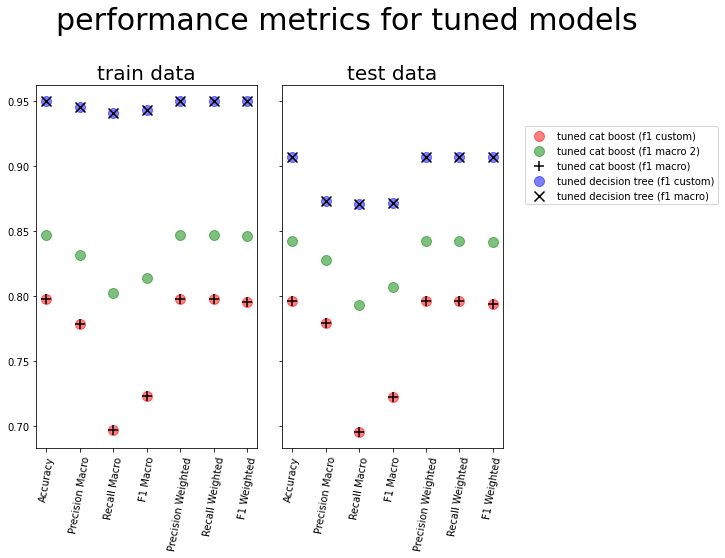

In [20]:
#pt_marker = [('o' , 0.5 , 'red') , ('o' , 0.5 ,'green') , ('+' , 1.0, 'black') , ('o' , 0.5 , 'blue') , ('x' , 1.0 ,'black')]

fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(10)
fig.set_tight_layout({'pad':2})

df_temp_train = df_model_metrics[df_model_metrics['Data']=='train']
df_temp_test  = df_model_metrics[df_model_metrics['Data']=='test']

model_count = 0
for group, subset in df_temp_train.groupby('Model (Tuning Metric)'):
    _ = ax[0].scatter(x=subset['metric name'], y=subset['metric value'], label=group,
                      marker=pt_marker[model_count][0], alpha=pt_marker[model_count][1],
                      color=pt_marker[model_count][2], s=100)
    #_ = ax[0].legend(bbox_to_anchor=(1.6, 0.9), loc='upper right')
    _ = ax[0].xaxis.set_tick_params(rotation=80)
    _ = ax[0].set_title('train data', size=20, weight=50)
    model_count += 1

model_count = 0
for group, subset in df_temp_test.groupby('Model (Tuning Metric)'):
    _ = ax[1].scatter(x=subset['metric name'], y=subset['metric value'], label=group,
                      marker=pt_marker[model_count][0], alpha=pt_marker[model_count][1], 
                      color=pt_marker[model_count][2], s=100)
    _ = ax[1].legend(bbox_to_anchor=(2.0, 0.9), loc='upper right')
    _ = ax[1].xaxis.set_tick_params(rotation=80)
    _ = ax[1].set_title('test data', size=20, weight=50)
    model_count += 1

_ = fig.suptitle('performance metrics for tuned models', size=30, weight=100)

# performance by class for tuned model
### use tuned model to predict training set and test set

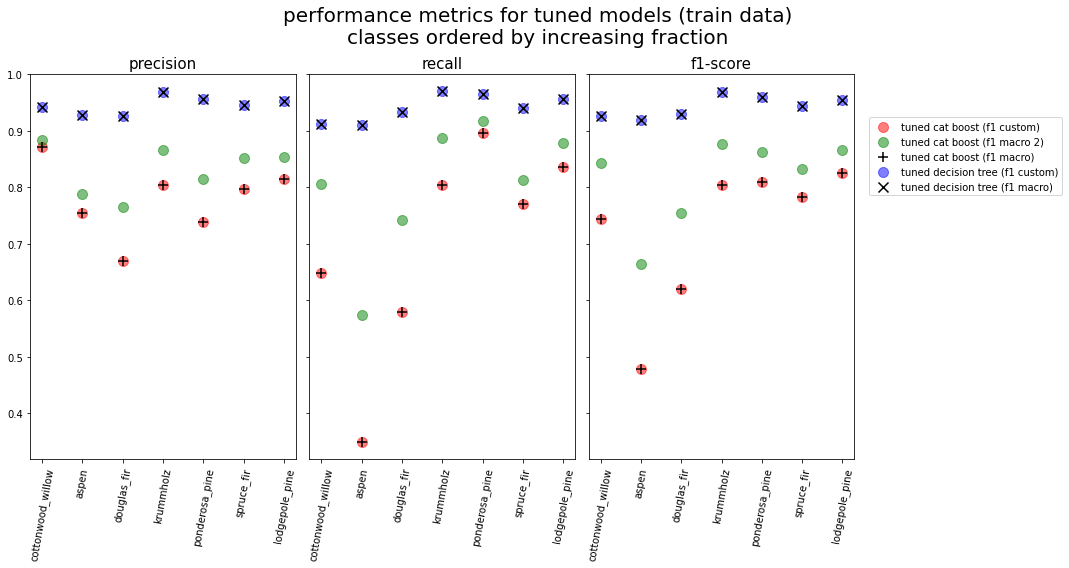

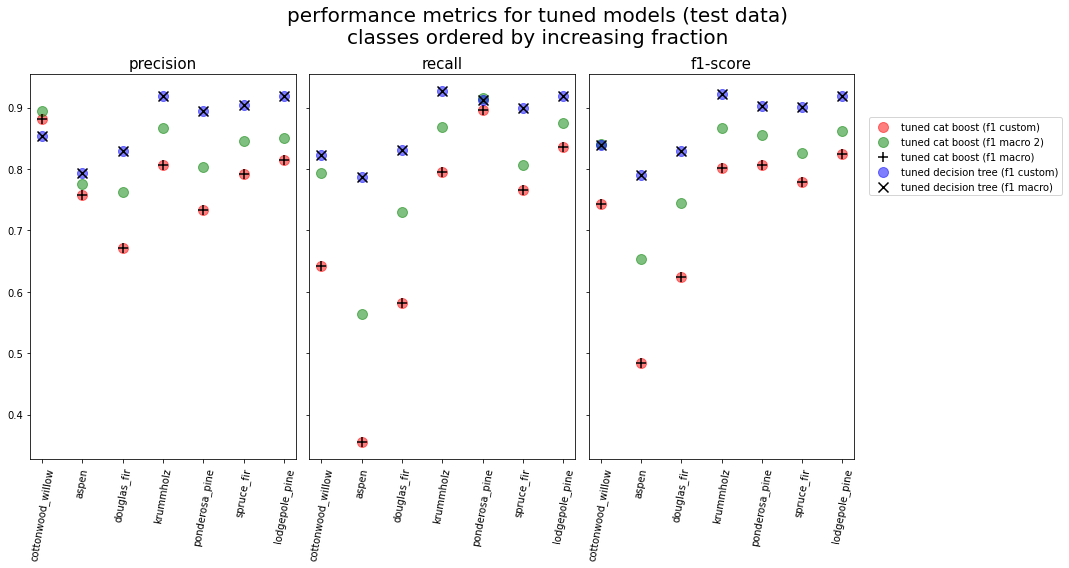

In [21]:
#pt_marker = [('o' , 0.5) , ('o' , 0.5) , ('+' , 1.0) , ('o' , 0.5) , ('+' , 1.0)]

for dataset in ['train', 'test']:
    fig, ax = plt.subplots(1, 3, sharey=True)
    _ = fig.set_figheight(8)
    _ = fig.set_figwidth(15)
    _ = fig.suptitle('performance metrics for tuned models (' + dataset + ' data)\nclasses ordered by increasing fraction',
                     size=20, weight=100)
    _ = fig.set_tight_layout({'pad':1})

    all_metrics_class = ['precision', 'recall', 'f1-score']
    
    model_count = 0
    for group, subset in df_results_by_class[df_results_by_class['data']==dataset].groupby('model (tuning metric)'):
        for index in range(3):
            _ = ax[index].scatter(x=subset['class'], y=subset[all_metrics_class[index]], label=group,
                                  marker=pt_marker[model_count][0], alpha=pt_marker[model_count][1],
                                  color=pt_marker[model_count][2], s=100)
            _ = ax[index].xaxis.set_tick_params(rotation=80)
            _ = ax[index].set_title(all_metrics_class[index], size=15, weight=50)

            if index==2:
                _ = ax[index].legend(bbox_to_anchor=(1.8, 0.9), loc='upper right')
            
        model_count += 1
        
        

# performance metrics for finalized model

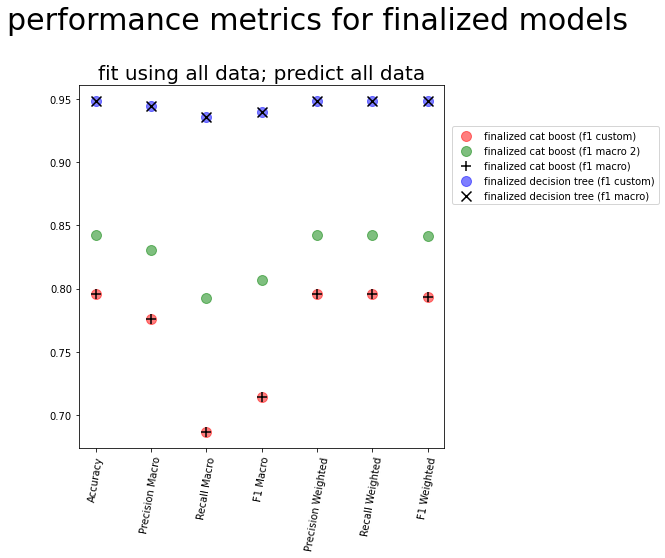

In [22]:
#pt_marker = [('o' , 0.5) , ('o' , 0.5) , ('+' , 1.0) , ('o' , 0.5) , ('+' , 1.0)]

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.set_tight_layout({'pad':2})

df_temp_all = df_model_metrics[df_model_metrics['Data']=='all']

model_count = 0
for group, subset in df_temp_all.groupby('Model (Tuning Metric)'):
    _ = ax.scatter(x=subset['metric name'], y=subset['metric value'], label=group,
                   marker=pt_marker[model_count][0], alpha=pt_marker[model_count][1],
                   color=pt_marker[model_count][2], s=100)
    _ = ax.legend(bbox_to_anchor=(1.6, 0.9), loc='upper right')
    _ = ax.xaxis.set_tick_params(rotation=80)
    _ = ax.set_title('fit using all data; predict all data', size=20, weight=50)
    
    model_count += 1

_ = fig.suptitle('performance metrics for finalized models', size=30, weight=100)

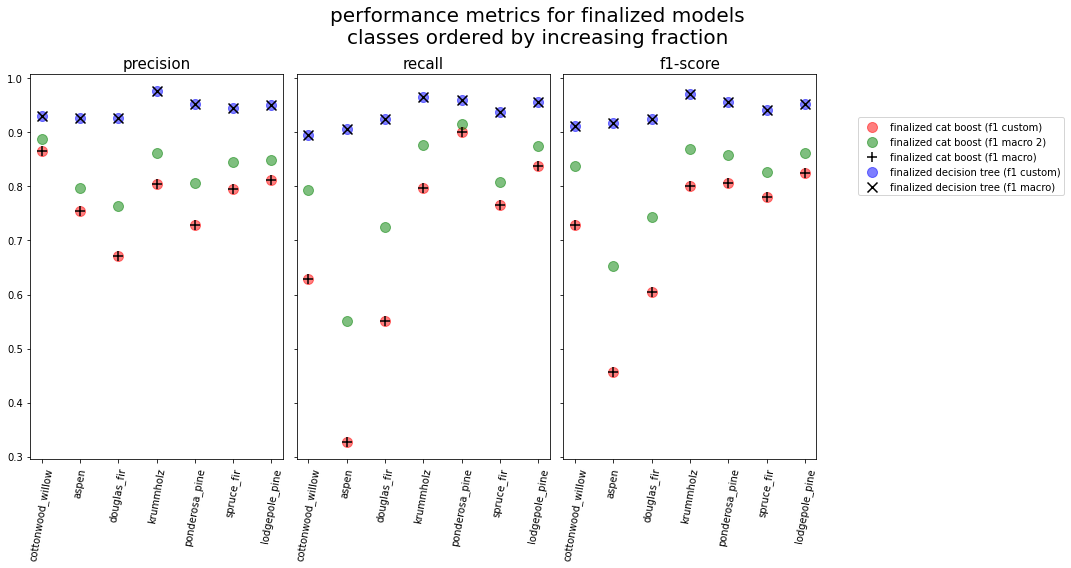

In [23]:
#pt_marker = [('o' , 0.5) , ('o' , 0.5) , ('+' , 1.0) , ('o' , 0.5) , ('+' , 1.0)]

for dataset in ['all']:
    fig, ax = plt.subplots(1, 3, sharey=True)
    _ = fig.set_figheight(8)
    _ = fig.set_figwidth(15)
    _ = fig.suptitle('performance metrics for finalized models\nclasses ordered by increasing fraction',
                     size=20, weight=100)
    _ = fig.set_tight_layout({'pad':1})

    all_metrics_class = ['precision', 'recall', 'f1-score']
    
    model_count = 0
    for group, subset in df_results_by_class[df_results_by_class['data']==dataset].groupby('model (tuning metric)'):
        for index in range(3):
            _ = ax[index].scatter(x=subset['class'], y=subset[all_metrics_class[index]], label=group,
                                  marker=pt_marker[model_count][0], alpha=pt_marker[model_count][1],
                                  color=pt_marker[model_count][2], s=100)
            _ = ax[index].xaxis.set_tick_params(rotation=80)
            _ = ax[index].set_title(all_metrics_class[index], size=15, weight=50)

            if index==2:
                _ = ax[index].legend(bbox_to_anchor=(2.0, 0.9), loc='upper right')
            
        model_count += 1
        
        

# performance metrics for finalized decision tree

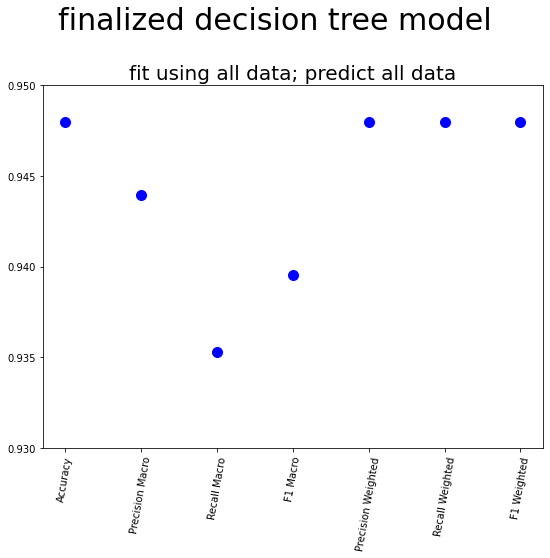

In [24]:
#pt_marker = [('o' , 0.5) , ('o' , 0.5) , ('+' , 1.0) , ('o' , 0.5) , ('+' , 1.0)]

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.set_tight_layout({'pad':2})

df_temp_all_best = df_model_metrics[(df_model_metrics['Data']=='all')  &
                                    (df_model_metrics['Model (Tuning Metric)']=='finalized decision tree (f1 macro)')]

for group, subset in df_temp_all_best.groupby('Model (Tuning Metric)'):
    _ = ax.scatter(x=subset['metric name'], y=subset['metric value'], label=group,
                   marker='o', alpha=1.0,
                   color='blue', s=100)
    #_ = ax.legend(bbox_to_anchor=(1.6, 0.9), loc='upper right')
    _ = ax.xaxis.set_tick_params(rotation=80)
    _ = ax.set_title('fit using all data; predict all data', size=20, weight=50)
    #_ = ax.set_ylim(0.93, 0.95)
    _ = ax.set_yticks([0.93, 0.935, 0.94, 0.945, 0.95])

_ = fig.suptitle('finalized decision tree model', size=30, weight=100)

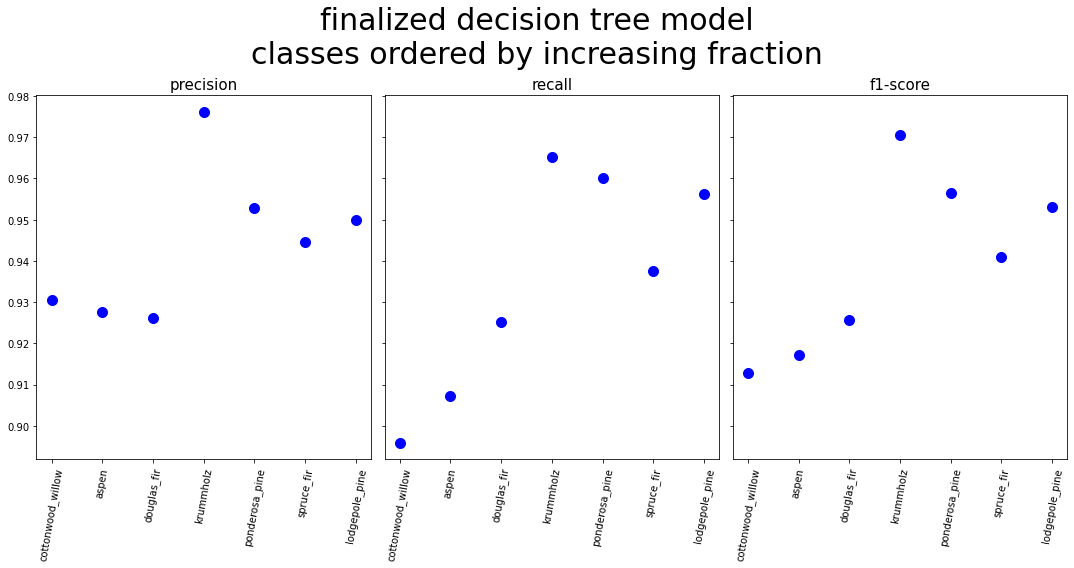

In [27]:
#pt_marker = [('o' , 0.5) , ('o' , 0.5) , ('+' , 1.0) , ('o' , 0.5) , ('+' , 1.0)]

for dataset in ['all']:
    fig, ax = plt.subplots(1, 3, sharey=True)
    _ = fig.set_figheight(8)
    _ = fig.set_figwidth(15)
    _ = fig.suptitle('finalized decision tree model\nclasses ordered by increasing fraction', size=30, weight=100)
    _ = fig.set_tight_layout({'pad':1})

    all_metrics_class = ['precision', 'recall', 'f1-score']

    df_temp_class_best = df_results_by_class[(df_results_by_class['data']==dataset)  &
                                    (df_results_by_class['model (tuning metric)']=='finalized decision tree (f1 macro)')]
    for group, subset in df_temp_class_best.groupby('model (tuning metric)'):
        for index in range(3):
            _ = ax[index].scatter(x=subset['class'], y=subset[all_metrics_class[index]], label=group,
                                  marker='o', alpha=1.0,
                                  color='blue', s=100)
            _ = ax[index].xaxis.set_tick_params(rotation=80)
            _ = ax[index].set_title(all_metrics_class[index], size=15, weight=50)
